In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import theano.tensor as tt
%matplotlib inline

## Define a model

In [17]:
with pm.Model() as model:
    parameter      = pm.Exponential("poisson_param", 1)
    data_generator = pm.Poisson("data_generator", parameter)

In [18]:
with model:
    data_plus_one = data_generator + 1

#### Test value

In [23]:
parameter.tag.test_value

array(0.693147177890573)

##### Modify test value

In [27]:
with pm.Model() as model:
    parameter = pm.Exponential("poisson_param", 1, testval=0.5)

print("\nparameter.tag.test_value =", parameter.tag.test_value)


parameter.tag.test_value = 0.49999999904767284


Generate a random variable

In [28]:
parameter.random()

array([ 0.91362864])

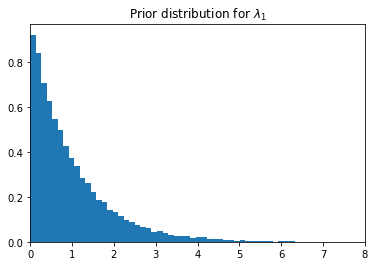

In [29]:
samples = [parameter.random()[0] for i in range(20000)]
plt.hist(samples, bins=70, normed=True, histtype="stepfilled")
plt.title("Prior distribution for $\lambda_1$")
plt.xlim(0, 8);

Including observations / fixing the value(?)

In [26]:
data = np.array([10, 5])
with model:
    fixed_variable = pm.Poisson("fxd", 1, observed=data)
print("value: ", fixed_variable.tag.test_value)

value:  [10  5]


In [32]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

100%|██████████| 10000/10000 [00:01<00:00, 6203.17it/s]


In [34]:
trace[0]

{'poisson_param': 0.7392576911053268,
 'poisson_param_log_': -0.3021087163735704}

In [36]:
with pm.Model() as model2:
    s = pm.ChiSquared("chi2", 1)